<a href="https://colab.research.google.com/github/devcodes9/BitcoinPredictionProject/blob/main/BitcoinProjectAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Bitcoin data(past 30 days) from CoinGeckoAPI

In [37]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id = "bitcoin",vs_currency= "inr",days = "30")

#Imports

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [25]:
df = pd.DataFrame(bitcoin_data["prices"],columns = ["Timestamp","Price"])
df["Date"] = pd.to_datetime(df["Timestamp"], unit = 'ms')
df

,Timestamp,Price,Date
0,1624629654637,2.454210e+06,2021-06-25 14:00:54.637
1,1624633255360,2.427742e+06,2021-06-25 15:00:55.360
2,1624636851247,2.435552e+06,2021-06-25 16:00:51.247
3,1624640467722,2.368178e+06,2021-06-25 17:01:07.722
4,1624644076874,2.352213e+06,2021-06-25 18:01:16.874
...,...,...,...
716,1627207262396,2.573918e+06,2021-07-25 10:01:02.396
717,1627210820365,2.558730e+06,2021-07-25 11:00:20.365
718,1627214405425,2.563636e+06,2021-07-25 12:00:05.425
719,1627218149167,2.555598e+06,2021-07-25 13:02:29.167


#Grouping Data

In [26]:
candlestick_data = df.groupby(df.Date.dt.date).agg({"Price":['min','max','first','last']})
candlestick_data

Price                                          
                     min           max         first          last
Date                                                              
2021-06-25  2.336596e+06  2.454210e+06  2.454210e+06  2.336596e+06
2021-06-26  2.236010e+06  2.401578e+06  2.369665e+06  2.364260e+06
2021-06-27  2.375662e+06  2.561059e+06  2.375662e+06  2.561059e+06
2021-06-28  2.536452e+06  2.610054e+06  2.569861e+06  2.559684e+06
2021-06-29  2.554662e+06  2.704052e+06  2.567077e+06  2.688410e+06
2021-06-30  2.546037e+06  2.676840e+06  2.672059e+06  2.588150e+06
2021-07-01  2.464709e+06  2.615846e+06  2.615846e+06  2.511287e+06
2021-07-02  2.454481e+06  2.520605e+06  2.509357e+06  2.516615e+06
2021-07-03  2.494973e+06  2.600585e+06  2.528724e+06  2.577352e+06
2021-07-04  2.574485e+06  2.682163e+06  2.591166e+06  2.640484e+06
2021-07-05  2.488224e+06  2.636233e+06  2.636233e+06  2.539505e+06
2021-07-06  2.519874e+06  2.608056e+06  2.519874e+06  2.553217e+06
2021-07-07  2.557010e+06  2.605933e+06  2.557010e+06  2.562413e+06
2021-07-08  2.423946e+06  2.538884e+06  2.538884e+06  2.433949e+06
2021-07-09  2.420754e+06  2.537359e+06  2.460851e+06  2.537359e+06
2021-07-10  2.488535e+06  2.551098e+06  2.530544e+06  2.509298e+06
2021-07-11  2.496679e+06  2.577341e+06  2.507886e+06  2.567270e+06
2021-07-12  2.450420e+06  2.577026e+06  2.554899e+06  2.471280e+06
2021-07-13  2.419705e+06  2.482480e+06  2.479322e+06  2.431828e+06
2021-07-14  2.376884e+06  2.464510e+06  2.443513e+06  2.464510e+06
2021-07-15  2.338864e+06  2.466474e+06  2.448440e+06  2.374443e+06
2021-07-16  2.325825e+06  2.401963e+06  2.362224e+06  2.358533e+06
2021-07-17  2.338991e+06  2.386197e+06  2.343771e+06  2.366153e+06
2021-07-18  2.333125e+06  2.406093e+06  2.357494e+06  2.358342e+06
2021-07-19  2.298496e+06  2.388071e+06  2.381073e+06  2.322268e+06
2021-07-20  2.205992e+06  2.322933e+06  2.319419e+06  2.205992e+06
2021-07-21  2.211698e+06  2.403132e+06  2.229604e+06  2.390953e+06
2021-07-22  2.377489e+06  2.423521e+06  2.405444e+06  2.402687e+06
2021-07-23  2.396214e+06  2.484193e+06  2.411688e+06  2.484193e+06
2021-07-24  2.495439e+06  2.565230e+06  2.495439e+06  2.535238e+06
2021-07-25  2.529933e+06  2.586907e+06  2.553179e+06  2.550545e+06

#Candlestick Graph

In [27]:
fig = go.Figure(data=[go.Candlestick(x= candlestick_data.index,
                open=candlestick_data['Price']['first'],
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'],
                close=candlestick_data['Price']['last'])])

fig.update_layout(xaxis_title = "Date",yaxis_title="Price(INR)",title = "BITCOIN CANDLESTICK CHART OVER PAST 30 DAYS")


fig.show()


#Visualizing Data

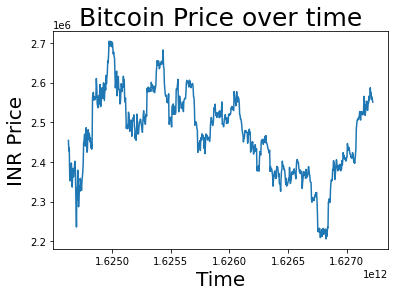

In [28]:
plt.plot(df["Timestamp"],df["Price"])
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("INR Price", size=20)
plt.show()

#Data Preprocessing

In [36]:
df.groupby(df.Date.dt.date).agg({"Price":['min','max','first','last']}).reset_index().to_csv('candlestick_data.csv')
data = pd.read_csv("candlestick_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop(labels=0, axis=0,inplace = True)
data.rename(columns= {'Price':'min','Price.1':'max','Price.2':'first','Price.3':'last'})


,Date,min,max,first,last
1,2021-06-25,2336595.614908006,2454209.7270241072,2454209.7270241072,2336595.614908006
2,2021-06-26,2236009.6679909113,2401578.2310942416,2369664.844261479,2364260.281860585
3,2021-06-27,2375661.6763331844,2561059.203307705,2375661.6763331844,2561059.203307705
4,2021-06-28,2536451.708019285,2610054.4963588403,2569861.398613361,2559683.8204874294
5,2021-06-29,2554662.378203684,2704051.787654166,2567077.4793474856,2688409.742013695
6,2021-06-30,2546037.2982406756,2676839.7639825726,2672058.846567196,2588150.3804286947
7,2021-07-01,2464708.6315101706,2615845.881011237,2615845.881011237,2511286.5150738456
8,2021-07-02,2454481.4627326424,2520604.934236673,2509356.7748803697,2516614.807979966
9,2021-07-03,2494973.0680993716,2600585.101246143,2528724.0459391717,2577351.512215878
10,2021-07-04,2574484.906627891,2682162.754500576,2591166.0871837907,2640483.9413501173


In [30]:
x = data.iloc[:,1:4]
y = data.iloc[:,-1]

# Splitting the data 

In [31]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state = 0,test_size = 0.20)

# Fitting Data

In [32]:
alg = LinearRegression()
alg.fit(x_train,y_train)
y_pred = alg.predict(x_test)
y_pred

array([2559438.16684123, 2545737.75532462, 2458967.84296096,
       2534571.98710098, 2393608.08767056, 2259484.15875924,
       2373041.52099821])

#Coefficient of determination(Score)

In [33]:
alg.score(x_test,y_test)

0.960516678941152

# Visualizing Predictions

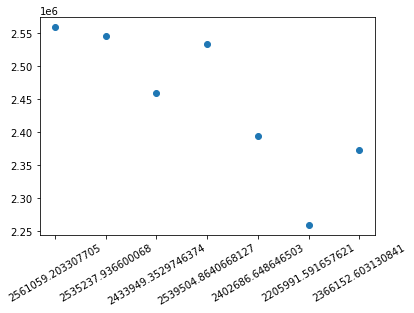

In [34]:
plt.scatter(y_test,y_pred)
plt.tick_params(axis='x', rotation = 30)

# Evaluating Model

In [35]:

mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error: ",rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2*100,"%")

Mean Square Error:  536352037.53258955
Root Mean Square Error:  23159.27541035318
R2 Score :  96.0516678941152 %
